In [1]:
import get_combine_data

/Users/caseydurfee/.virtualenvs/py3-data/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
all_data = get_combine_data.get_data(drafted_only=True)

on position K, can't do metric Vertical
on position P, can't do metric Vertical
on position K, can't do metric Bench
on position P, can't do metric Bench
on position QB, can't do metric Bench
on position K, can't do metric Broad Jump
on position P, can't do metric Broad Jump
on position K, can't do metric 3Cone
on position P, can't do metric 3Cone
on position K, can't do metric Shuttle
on position P, can't do metric Shuttle


this code calculates the overall quantiles (0-99) for each exercise, and then the deciles for within that position. For instance, a player may have a q_Bench of 50, indicating they are average for all drafted players, but a d_Bench of 8, indicating they are better than 80% of the players at their position.

Some positions don't have a lot of players, so I am merging some of them together.

In [3]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

## do SVD based on the overal quantiles
## TruncatedSVD should handle sparse data better than other methods
## however, it can't handle nan's

X_sparse = get_combine_data.get_sparse_data(all_data)

svd = TruncatedSVD(n_components=2)

svd.fit(X_sparse)

TruncatedSVD()

plot the results, we only want to use a sample of all_data so the graph isn't too loud.

I'm going to pick just 2 positions to see if we can illustrate a clear difference.

In [4]:
group_of_interest = all_data.loc[(all_data.Pos == "WR") | (all_data.Pos == "DT")]
sample = X_norm.loc[group_of_interest.index, :].sample(200)
transformed = svd.transform(sample)
full_data_for_transformed = all_data.loc[sample.index]

/Users/caseydurfee/.virtualenvs/py3-data/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


this is a plot of WR's versus DT players. there should be a lot of separation between the two classes.

the linearity around the 0,0 point is interesting and certainly looks like an artifact...

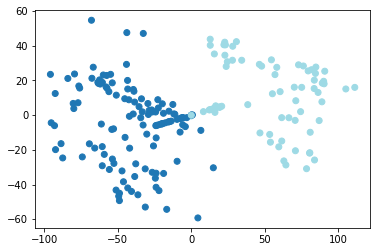

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

position_as_num = pd.factorize(full_data_for_transformed.Pos)[0]

plt.scatter(transformed[:,0], transformed[:,1], c=position_as_num, cmap='tab20')

/Users/caseydurfee/.virtualenvs/py3-data/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


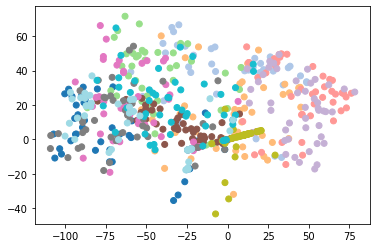

In [6]:

group_of_interest = get_combine_data.top_players_at_position(all_data)

fix, ax = plt.subplots()

sample = X_norm.loc[group_of_interest.index, :]
transformed = svd.transform(sample)
full_data_for_transformed = all_data.loc[sample.index]
position_as_num = pd.factorize(full_data_for_transformed.general_position)[0]
ax.scatter(transformed[:,0], transformed[:,1], c=position_as_num, cmap='tab20')
#ax.legend()

/Users/caseydurfee/.virtualenvs/py3-data/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


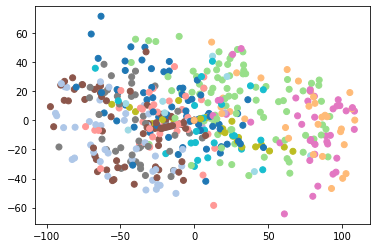

In [10]:

# group_of_interest = all_data

# fix, ax = plt.subplots()

# sample = X_norm.loc[group_of_interest.index, :].sample(500)
# transformed = svd.transform(sample)
# full_data_for_transformed = all_data.loc[sample.index]
# position_as_num = pd.factorize(full_data_for_transformed.general_position)[0]
# ax.scatter(transformed[:,0], transformed[:,1], c=position_as_num, cmap='tab20')
# #ax.legend()

TODO/in progress

* I need to merge together some of the player positions.
* It would be better to pick the top n draft picks for each position.
* I need to pull in principal component values into all_data, to make working with code easier
* then I need to start using altair, eg.

`Chart(df).mark_point().encode(x='petalLength',y='sepalLength', color='species')`


In [ ]:
all_data.Pos.value_counts()

try by general position.. are clusters better?

In [ ]:
general_pos_data = get_combine_data.get_data(True, 'general_position')

quant_cols = [x for x in general_pos_data.columns if x.startswith("q_")]
X = general_pos_data[quant_cols]
X_norm = X.fillna(49.5) - 49.5

X_sparse = csr_matrix(X_norm)

svd = TruncatedSVD(n_components=2)

svd.fit(X_sparse)

on position ST, can't do metric Vertical
on position ST, can't do metric Bench
on position QB, can't do metric Bench
on position ST, can't do metric Broad Jump
on position ST, can't do metric 3Cone
on position ST, can't do metric Shuttle


/Users/caseydurfee/.virtualenvs/py3-data/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


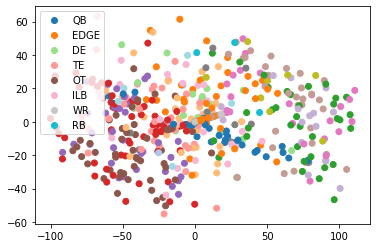

In [26]:


#DEBUG
group_of_interest = general_pos_data

#group_of_interest = general_pos_data.loc[(general_pos_data.Pos == "WR") | (general_pos_data.Pos == "DT")]

sample = X_norm.loc[group_of_interest.index, :].sample(500)
transformed = svd.transform(sample)
full_data_for_transformed = general_pos_data.loc[sample.index]
pd_fac = pd.factorize(full_data_for_transformed.Pos)
position_as_num = pd_fac[0]

fig, ax = plt.subplots()


# yeah, so the problem is it really wants you to 

scatter = ax.scatter(transformed[:,0], transformed[:,1], c=position_as_num, cmap='tab20')
plt.legend(handles=scatter.legend_elements()[0], labels=list(pd_fac[1]))

# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="Classes")
# ax.add_artist(legend1)


plt.show()


In [ ]:
svd.explained_variance_ratio_

In [ ]:
general_pos_data.general_position.value_counts()